In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ds_fun

#These imports were constructed

#Tools to build machine learning models and reports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

#Removes warnings and imporves asthenics
import warnings
#warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

Acquire:

In [2]:
wine_df = ds_fun.pour_wine()

Prepare:

In [3]:
train, val, test = ds_fun.train_validate(wine_df, random_seed=1969)

In [4]:
cont_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [5]:
train, val, test = ds_fun.scale_cont_columns(train, val, test , cont_columns, scaler_model = 1)

In [6]:
qual_class = [0,5,7,9]
qual_bins = ['low', 'med', 'high']

In [7]:
#train = pd.cut(qual_class, qual_bins)

Engineer:

In [8]:
cluster_list = [ 'density', 'volatile acidity', 'chlorides', 'alcohol']

In [9]:
cluster_list0 = [ 'density', 'volatile acidity']

In [10]:
cluster_list1 = [ 'density', 'chlorides']

In [11]:
cluster_list2 = [ 'density', 'alcohol']

In [12]:
cluster_list3 = [ 'volatile acidity', 'chlorides']

In [13]:
cluster_list4 = ['volatile acidity', 'alcohol']

In [14]:
cluster_list5 = ['chlorides', 'alcohol']

In [15]:
cluster_list6 = ['volatile acidity', 'chlorides', 'alcohol']

In [16]:
cluster_list7 = [ 'density', 'chlorides', 'alcohol']

In [17]:
cluster_list8 = [ 'density', 'volatile acidity', 'alcohol']

In [18]:
cluster_list9 = [ 'density', 'volatile acidity', 'chlorides']

In [19]:
n_clusters = 2

In [20]:
n_clusters0 = 4

In [21]:
n_clusters1 = 2

In [22]:
n_clusters2 = 2

In [23]:
n_clusters3 = 2

In [24]:
n_clusters4 = 4

In [25]:
n_clusters5 = 2

In [26]:
n_clusters6 = 4

In [27]:
n_clusters7 = 2

In [28]:
n_clusters8 = 2

In [29]:
n_clusters9 = 3

In [30]:
#ds_fun.elbow_method(train, cluster_list)

In [31]:

def testing_clusters(train, val, test, cluster_list, n_clusters = 2):
    #Builds the cluster object with the desired number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(train[cluster_list])

    #Builds a column with the cluster numbers
    train['cluster_preds'] = kmeans.predict(train[cluster_list])
    val['cluster_preds'] = kmeans.predict(val[cluster_list])
    test['cluster_preds'] = kmeans.predict(test[cluster_list])


    train.drop(columns=cluster_list, inplace = True)
    val.drop(columns=cluster_list, inplace = True) 
    test.drop(columns=cluster_list, inplace = True) 
          
    dumb_list = ['type', 'cluster_preds']

    
    train = pd.get_dummies(train, columns = dumb_list)

    val = pd.get_dummies(val, columns = dumb_list)

    test = pd.get_dummies(test, columns = dumb_list)

    return train, val, test

In [32]:
#train, val, test = testing_clusters(train, val, test, cluster_list, n_clusters = n_clusters)

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(train[cluster_list])

#Builds a column with the cluster numbers
train['cluster_preds'] = kmeans.predict(train[cluster_list])

pd.get_dummies(train,columns=['type', 'cluster_preds'])

dummy_df = pd.get_dummies(train[['cluster_preds', 'type']])
dummy_df.head()

In [33]:
train = pd.get_dummies(train, columns=['type'])
val = pd.get_dummies(val, columns=['type'])
test = pd.get_dummies(test, columns=['type'])

In [34]:
target_col = 'quality'

In [35]:
X_train, y_train, X_val, y_val, X_test, y_test = ds_fun.train_val_test(train, val, test, target_col)

In [36]:
baseline = ds_fun.find_regression_baseline(y_train)

Using RMSE Mean training baseline: 0.8640


In [37]:
"""
This function shows a comparison in baselines for mean and median.
Output is the RMSE error when using both mean and median.
"""

# Train set
bl_df = pd.DataFrame({'actual':y_train, 'mean_bl':y_train.mean(), 'median_bl':y_train.median()})
print(y_train.mean())
print(y_train.median())

rmse_train_mean = mean_squared_error(bl_df['actual'], bl_df['mean_bl'], squared=False)
rmse_train_median = mean_squared_error(bl_df['actual'], bl_df['median_bl'], squared=False)


#if min(rmse_train_mean, rmse_train_median) == rmse_train_median:
print(f'Using RMSE Median training baseline: {round(rmse_train_median,4):,.4f}')
#elif min(rmse_train_mean, rmse_train_median) == rmse_train_mean:
print(f'Using RMSE Mean training baseline: {round(rmse_train_mean,4):,.4f}')

print(min(rmse_train_mean, rmse_train_median))

5.817190506735087
6.0
Using RMSE Median training baseline: 0.8832
Using RMSE Mean training baseline: 0.8640
0.8640415848996251


In [38]:
#List for gathering metrics
rmse_scores = []


""" *** Builds and fits Linear Regression Model (OLS) *** """


lm = LinearRegression(normalize=True, positive=True)
lm.fit(X_train, y_train)

#Train data
lm_preds = pd.DataFrame({'actual':y_train})
lm_preds['pred_lm'] = lm.predict(X_train)

#Validate data
lm_val_preds = pd.DataFrame({'actual':y_val})
lm_val_preds['lm_val_preds'] = lm.predict(X_val)

#Finds score on Train and Validate data
rmse_train = mean_squared_error(lm_preds['actual'],
                                lm_preds['pred_lm'],
                                squared=False) 
rmse_val = mean_squared_error(lm_val_preds['actual'],
                              lm_val_preds['lm_val_preds'],
                              squared=False) 

#Adds score to metrics list for later comparison
rmse_scores.append({'Model':'OLS Linear',
                'RMSE on Train': round(rmse_train,4),
                'RMSE on Validate': round(rmse_val,4)})

In [39]:
""" *** Builds and fits Lasso Lars Model *** """


lars = LassoLars(alpha=.25, max_iter=1000) #
lars.fit(X_train, y_train)

#Train data
ll_preds = pd.DataFrame({'actual':y_train})
ll_preds['pred_ll'] = lars.predict(X_train)

#Validate data
ll_val_preds = pd.DataFrame({'actual':y_val})
ll_val_preds['ll_val_preds'] = lars.predict(X_val)

#Finds score on Train and Validate data
rmse_train = mean_squared_error(ll_preds['actual'],
                                ll_preds['pred_ll'],
                                squared=False)
rmse_val = mean_squared_error(ll_val_preds['actual'],
                              ll_val_preds['ll_val_preds'],
                              squared=False)

#Adds score to metrics list for later comparison
rmse_scores.append({'Model':'Lasso Lars',
                'RMSE on Train': round(rmse_train,4),
                'RMSE on Validate': round(rmse_val,4)})

In [40]:
""" *** Builds and fits Tweedie Regressor (GLM) Model *** """

glm = TweedieRegressor(power=1, alpha=1)    
glm.fit(X_train, y_train)

#Train data
glm_preds = pd.DataFrame({'actual':y_train})
glm_preds['pred_glm'] = glm.predict(X_train)

#Validate data
glm_val_preds = pd.DataFrame({'actual':y_val})
glm_val_preds['glm_val_preds'] = glm.predict(X_val)

#Finds score on Train and Validate data
rmse_train = mean_squared_error(glm_preds['actual'],
                                glm_preds['pred_glm'],
                                squared=False) 
rmse_val = mean_squared_error(glm_val_preds['actual'],
                              glm_val_preds['glm_val_preds'],
                              squared=False)

#Adds score to metrics list for later comparison
rmse_scores.append({'Model':'Tweedie',
                    'RMSE on Train': round(rmse_train,4),
                    'RMSE on Validate': round(rmse_val,4)})

In [41]:
""" *** Builds and fits Polynomial regression Model *** """


#Polynomial Regression part:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=1)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_val)
#X_test_degree2 = pf.transform(X_test)

#Polynomial Regression being fed into Linear Regression:
lm2 = LinearRegression(normalize=True)
lm2.fit(X_train_degree2, y_train)

#Train data
lm2_preds = pd.DataFrame({'actual':y_train})
lm2_preds['pred_lm2'] = lm2.predict(X_train_degree2)

#Validate data
lm2_val_preds = pd.DataFrame({'actual':y_val})
lm2_val_preds['lm2_val_preds'] = lm2.predict(X_validate_degree2)

#Finds score on Train and Validate data
rmse_train = mean_squared_error(lm2_preds['actual'],
                                lm2_preds['pred_lm2'],
                                squared=False) 
rmse_val = mean_squared_error(lm2_val_preds['actual'],
                              lm2_val_preds['lm2_val_preds'],
                              squared=False)

#Adds score to metrics list for later comparison
rmse_scores.append({'Model':'Polynomial',
                    'RMSE on Train': round(rmse_train,4),
                    'RMSE on Validate': round(rmse_val,4)})

In [42]:
""" *** Later comparison section to display results *** """

#Builds and displays results DataFrame
rmse_scores = pd.DataFrame(rmse_scores)
rmse_scores['Difference'] = round(rmse_scores['RMSE on Train'] - rmse_scores['RMSE on Validate'],2)    

#Results were too close so had to look at the numbers
print(rmse_scores)

#Building variables for plotting
rmse_min = min([rmse_scores['RMSE on Train'].min(),
                rmse_scores['RMSE on Validate'].min(), baseline])
rmse_max = max([rmse_scores['RMSE on Train'].max(),
                rmse_scores['RMSE on Validate'].max(), baseline])

lower_limit = rmse_min * 0.8
upper_limit = rmse_max * 1.05

        Model  RMSE on Train  RMSE on Validate  Difference
0  OLS Linear         0.7130            0.7511       -0.04
1  Lasso Lars         0.8640            0.8876       -0.02
2     Tweedie         0.8182            0.8406       -0.02
3  Polynomial         0.7130            0.7511       -0.04


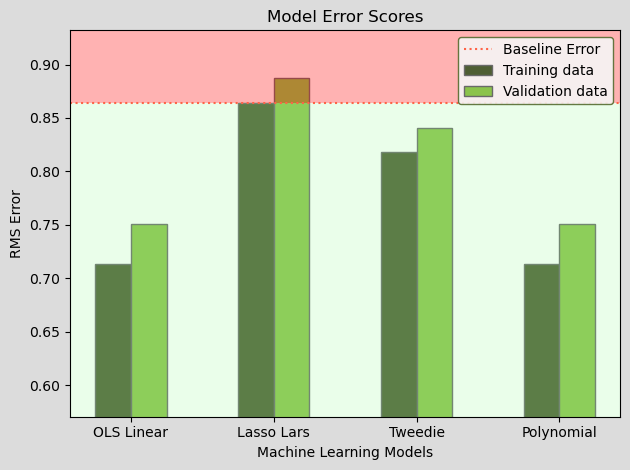

In [43]:
x = np.arange(len(rmse_scores))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(facecolor="gainsboro")
rects1 = ax.bar(x - width/2, rmse_scores['RMSE on Train'],
                width, label='Training data', color='#4e5e33',
                edgecolor='dimgray') #Codeup dark green
rects2 = ax.bar(x + width/2, rmse_scores['RMSE on Validate'],
                width, label='Validation data', color='#8bc34b',
                edgecolor='dimgray') #Codeup light green

# Need to have baseline input:
plt.axhline(baseline, label="Baseline Error", c='tomato', linestyle=':')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.axhspan(0, baseline, facecolor='palegreen', alpha=0.2)
ax.axhspan(baseline, upper_limit, facecolor='red', alpha=0.3)
ax.set_ylabel('RMS Error')
ax.set_xlabel('Machine Learning Models')
ax.set_title('Model Error Scores')
ax.set_xticks(x, rmse_scores['Model'])

plt.ylim(bottom=lower_limit, top = upper_limit)

ax.legend(loc='upper right', framealpha=.9, facecolor="whitesmoke",
          edgecolor='darkolivegreen')

#ax.bar_label(rects1, padding=4)
#ax.bar_label(rects2, padding=4)
fig.tight_layout()
#plt.savefig('best_model_all_features.png')
plt.show()